<a href="https://colab.research.google.com/github/Flociah/dsc-running-jupyter-locally-lab/blob/master/Understanding_Pandas_Series_and_DataFrames_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame
- Perform operations to change the structure of pandas DataFrames
- Change the index of a pandas DataFrame
- Change data types of columns in pandas DataFrames

## Let's get started

Import the file `'turnstile_180901.txt'`.

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case:

In [4]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# Renaming all the columns to lower case
df.columns = [col.lower() for col in df.columns]



In [7]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`:

In [8]:
# Change the index to 'linename'
df = df.set_index('linename')


Reset the index:

In [9]:
# Reset the index
df = df.reset_index()


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order.

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [10]:
# Adding a new 'num_lines' column
df['num_lines'] = df['linename'].map(lambda x: len(x))

# Sorting the DataFrame by the 'num_lines' column in descending order
df = df.sort_values(by='num_lines', ascending=False)


Write a function to clean column names:

In [11]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [12]:
# Clean the column name, handling None values
def clean(col_name):
    if col_name is None:
        return col_name
    else:
        cleaned = col_name.strip()
        return cleaned

In [13]:
# Use the above function to clean the column names
df.columns = [clean(col) for col in df.columns]



In [14]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date
- Add a new column `'day_of_week'` that represents the day of the week

In [15]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])


# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['date'].dt.day_name()






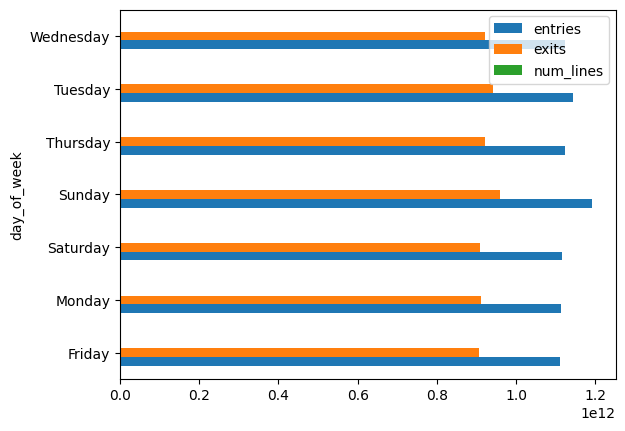

In [16]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped`
- Print the first five rows of `grouped`

In [18]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
df.head()


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day_of_week
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map`

In [19]:
# Adding a new coumn is_weekend mapping day of the week
weekend_map = {
    'Monday': 0,
    'Tuesday': 0,
    'Wednesday': 0,
    'Thursday': 0,
    'Friday': 0,
    'Saturday': 1,
    'Sunday': 1
}

            index        entries          exits  num_lines
is_weekend                                                
0              16  5614154250681  4602290732124     381306
1               5  2307967724596  1868365831935     150031


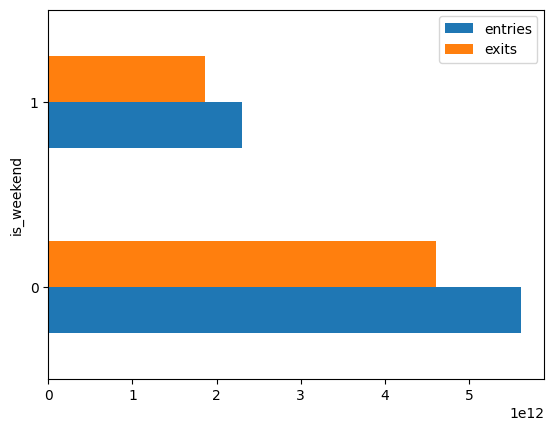

In [21]:
# Create the 'is_weekend' column using the mapping
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only=True)

# Check if wkend DataFrame is empty
print(wkend.head())

# Proceed with plotting if wkend is not empty
if not wkend.empty:
    wkend[['entries', 'exits']].plot(kind='barh')
    plt.show()
else:
    print("The 'wkend' DataFrame is empty. Check previous data processing steps.")

Remove the `'c/a'` and `'scp'` columns.

In [22]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns=['c/a', 'scp'])
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday


## Analysis Question

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [24]:
'''
The problem with the plotted chart is that it likely shows cumulative values for entries and exits over time without accounting for the actual changes between time points. This means the chart might display a continuously increasing trend without revealing the real fluctuations in the data. To get a meaningful representation, you need to first sort the data by time and station, then calculate the differences between consecutive time points to reflect the actual changes in entries and exits. Without these steps, the chart could be misleading, showing cumulative totals rather than the true dynamics of the data.
'''

'\nThe problem with the plotted chart is that it likely shows cumulative values for entries and exits over time without accounting for the actual changes between time points. This means the chart might display a continuously increasing trend without revealing the real fluctuations in the data. To get a meaningful representation, you need to first sort the data by time and station, then calculate the differences between consecutive time points to reflect the actual changes in entries and exits. Without these steps, the chart could be misleading, showing cumulative totals rather than the true dynamics of the data.\n'

## Summary

You practiced your data cleanup skills using Pandas.